# Power Analysis
### Goal: Introduce the concept of power analysis on a case of independent two sample T-test

In [1]:
# importing libraries ----
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

# settings ----
%matplotlib inline
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (12.0, 8.0)

## Power Analysis - Find the required sample size 

In [2]:
# parameters for the analysis 
effect_size = 0.8
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, 
                                         power = power, 
                                         alpha = alpha)

print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 25.52


## Power Analysis - 2D Sensitivity Analysis 

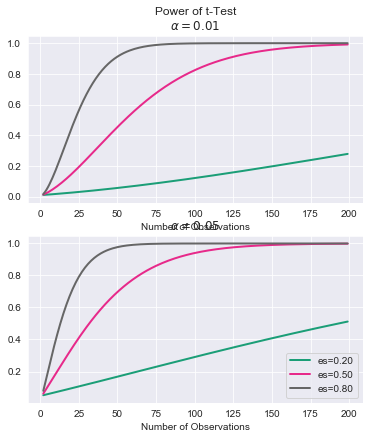

In [3]:
#power vs. number of observations 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='nobs',
                                 nobs= np.arange(2, 200),
                                 effect_size=np.array([0.2, 0.5, 0.8]),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

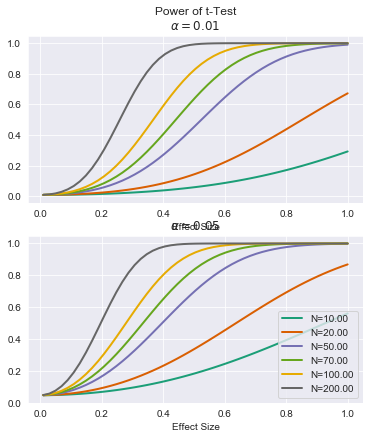

In [4]:
# power vs. effect size 

fig = plt.figure()
ax = fig.add_subplot(2,1,1)
fig = TTestIndPower().plot_power(dep_var='es',
                                 nobs=np.array([10, 20, 50, 70, 100, 200]),
                                 effect_size=np.linspace(0.01, 1, 51),
                                 alpha=0.01,
                                 ax=ax, title='Power of t-Test' + '\n' + r'$\alpha = 0.01$')
ax.get_legend().remove()
ax = fig.add_subplot(2,1,2)
fig = TTestIndPower().plot_power(dep_var='es',
                                 nobs=np.array([10, 20, 50, 70, 100, 200]),
                                 effect_size=np.linspace(0.01, 1, 51),
                                 alpha=0.05,
                                 ax=ax, title=r'$\alpha = 0.05$') 
fig.subplots_adjust(top = 1.4)

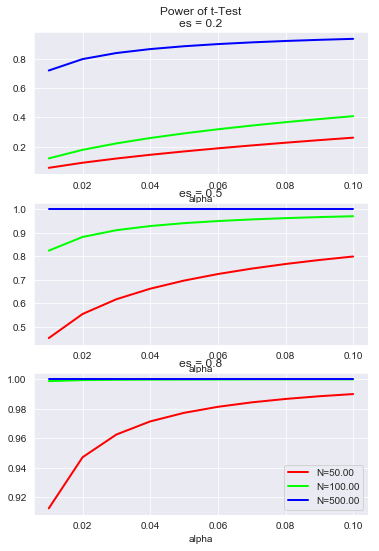

In [5]:
# power vs. significance level

fig = plt.figure()
ax = fig.add_subplot(3,1,1)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.2,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title='Power of t-Test' + '\n' + r'es = 0.2')
ax.get_legend().remove()
ax = fig.add_subplot(3,1,2)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.5,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title=r'es = 0.5') 
ax.get_legend().remove()
ax = fig.add_subplot(3,1,3)
fig = TTestIndPower().plot_power(dep_var='alpha',
                                 alpha=np.linspace(0.01, 0.1, 10),
                                 effect_size=0.8,
                                 nobs = np.array([50, 100, 500]),
                                 ax = ax, 
                                 title=r'es = 0.8')
fig.subplots_adjust(top = 1.8)

## Power Analysis - 3D Sensitivity Analysis 

In [ ]:
# for this part I assume significance level of 0.05

@np.vectorize
def power_grid(x,y):
    power = TTestIndPower().solve_power(effect_size = x, 
                                        nobs1 = y, 
                                        alpha = 0.05)
    return power

X,Y = np.meshgrid(np.linspace(0.01, 1, 51), 
                  np.linspace(10, 1000, 100))
X = X.T
Y = Y.T

Z = power_grid(X, Y) # power